In [617]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS
from os import path
from nltk.probability import FreqDist
from rake_nltk import Rake
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer


%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)
pd.set_option('display.notebook_repr_html', True)



Original article:
http://kaylinwalker.com/50-years-of-pop-music/

In [353]:

# url='https://raw.githubusercontent.com/walkerkq/musiclyrics/master/billboard_lyrics_1964-2015.csv'
# df=pd.read_csv('https://raw.githubusercontent.com/walkerkq/musiclyrics/master/billboard_lyrics_1964-2015.csv')
# df.head()

In [354]:
# df.to_csv(path.join('..','datasets','songs.csv'))


In [355]:
df=pd.read_csv(path.join('..','datasets','songs.csv'))
df.drop(['Unnamed: 0'],inplace = True, axis = 1)
df.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


# Wordclouds


(-0.5, 399.5, 199.5, -0.5)

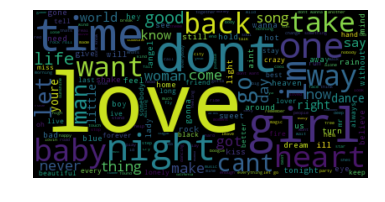

In [356]:
# Generate a word cloud image from Song Names
wordcloud = WordCloud().generate(' '.join(df['Song']))
# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [357]:
# store to file
wordcloud.to_file(path.join('..', 'assets', 'songs_cloud.png'))


(-0.5, 399.5, 199.5, -0.5)

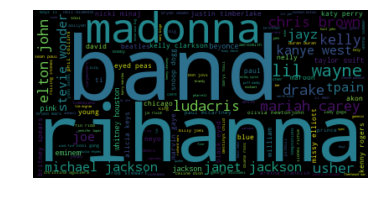

In [358]:
stopwords = set(STOPWORDS)
stopwords.add("featuring")

# generate word cloud
wordcloud2 = WordCloud(stopwords=stopwords)
wordcloud2.generate(' '.join(df['Artist']))


# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

In [359]:
wordcloud2.to_file(path.join('..', 'assets', 'artists_cloud.png'))

# Most Frequently in Billboard 100 List


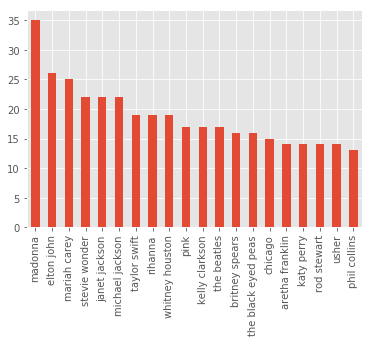

In [360]:
fig, ax = plt.subplots()
df['Artist'].value_counts()[:20].plot(ax=ax, kind='bar')
fig.savefig(path.join('..', 'assets', 'most_artists.png'))


# Average Hits Per Year vs Career Lifespan

In [361]:

grouped_df = df.groupby( [ "Artist"] ).size().reset_index(name = "Song_Count")
grouped_df['First_Year'] = 0
grouped_df['Last_Year'] = 0
grouped_df.head()

,Artist,Song_Count,First_Year,Last_Year
0,the mysterians,1,0,0
1,100 proof aged in soul,1,0,0
2,10000 maniacs,1,0,0
3,10cc,2,0,0
4,112,3,0,0


In [362]:
# for i in range(0, len(grouped_df)):
#     name = grouped_df.Artist[i]
#     rows = df[(df.Artist == name)]
#     grouped_df['First_Year'][i] = rows.Year.min()
#     grouped_df['Last_Year'][i] = rows.Year.max()

# grouped_df['Career_Span'] = grouped_df['Last_Year'] - grouped_df['First_Year']+1
# grouped_df.to_csv(path.join('..','datasets','grouped_songs.csv'))


In [363]:
grouped_df=pd.read_csv(path.join('..','datasets','grouped_songs.csv'))
grouped_df.drop(['Unnamed: 0'],inplace = True, axis = 1)
grouped_df.head()


,Artist,Song_Count,First_Year,Last_Year,Career_Span
0,the mysterians,1,1966,1966,1
1,100 proof aged in soul,1,1970,1970,1
2,10000 maniacs,1,1994,1994,1
3,10cc,2,1975,1977,3
4,112,3,1997,2001,5


In [364]:
grouped_df['Avg_Songs_Per_Year'] = grouped_df['Song_Count']/grouped_df['Career_Span']
grouped_df_min5 = grouped_df[(grouped_df.Song_Count > 4)]
grouped_df_min5.head()


,Artist,Song_Count,First_Year,Last_Year,Career_Span,Avg_Songs_Per_Year
16,3 doors down,8,2000,2008,9,0.888889
25,50 cent,5,2003,2005,3,1.666667
34,98 degrees,6,1997,2000,4,1.500000
38,aaliyah,11,1994,2003,10,1.100000
41,abba,6,1974,1981,8,0.750000


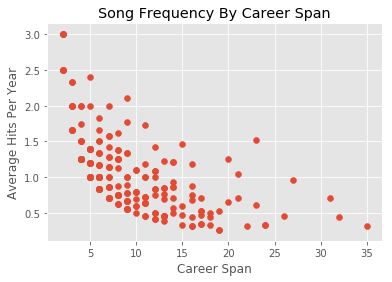

In [365]:
y = grouped_df_min5.Avg_Songs_Per_Year
x = grouped_df_min5.Career_Span
# plt.scatter(x, y, s=area, c=colors, alpha=0.5)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Song Frequency By Career Span')
ax.set_xlabel('Career Span')
ax.set_ylabel('Average Hits Per Year')

plt.scatter(x,y)
plt.show()

In [366]:
fig.savefig(path.join('..', 'assets', 'song_frequency.png'))

# Career Span

In [367]:

grouped_df_top20 = grouped_df.nlargest(20, 'Song_Count')
grouped_df_top20.head()

,Artist,Song_Count,First_Year,Last_Year,Career_Span,Avg_Songs_Per_Year
1356,madonna,35,1984,2006,23,1.521739
681,elton john,26,1972,1998,27,0.962963
1367,mariah carey,25,1990,2009,20,1.250000
984,janet jackson,22,1986,2000,15,1.466667
1448,michael jackson,22,1972,2002,31,0.709677


In [368]:
min_xrange = grouped_df_top20.First_Year.min()
max_xrange = grouped_df_top20.Last_Year.max()
min_yrange = grouped_df_top20.Song_Count.min()
max_yrange = grouped_df_top20.Song_Count.max()

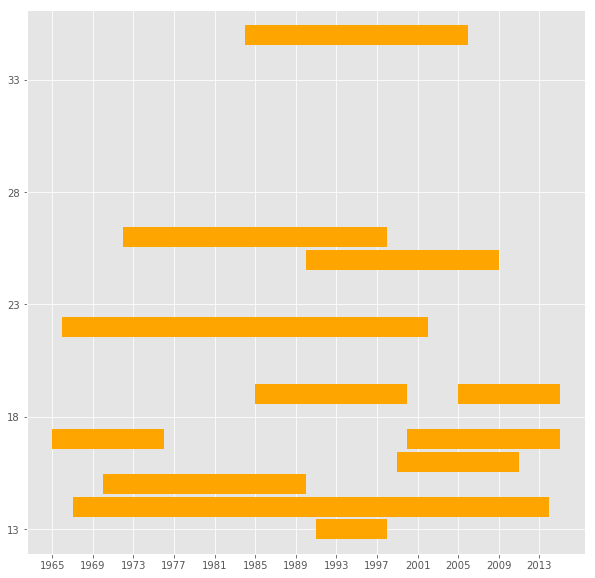

In [369]:
# for i in range(0,5):
fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111)

plt.plot([grouped_df_top20.First_Year, grouped_df_top20.Last_Year], [grouped_df_top20.Song_Count, grouped_df_top20.Song_Count], lw=20, color="orange", solid_capstyle="butt")

plt.yticks(range(min_yrange, max_yrange, 5))
plt.xticks(range(min_xrange, max_xrange, 4))

plt.show()

# Need help in labeling these charts with the name of the artist

In [370]:
fig.savefig(path.join('..', 'assets', 'career_range.png'))

In [371]:
df['Word_Count'] = 0
df['Word_Count'] = df['Lyrics'].str.split().str.len()
df.head()

,Rank,Song,Artist,Year,Lyrics,Source,Word_Count
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,125.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,204.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,152.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,232.0


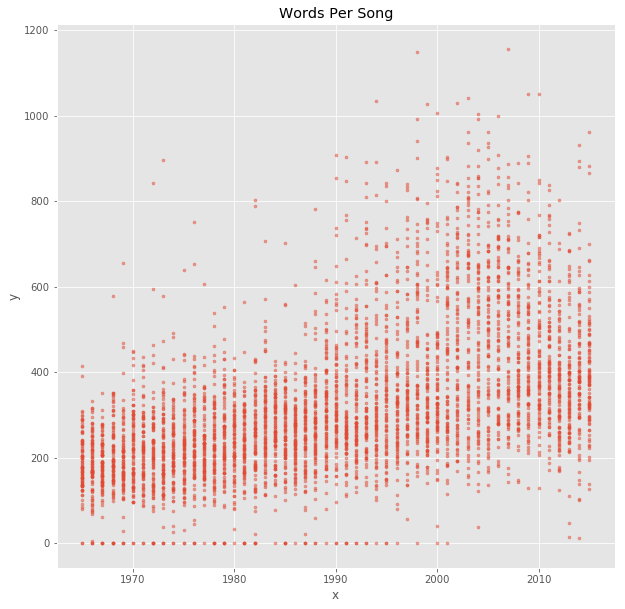

In [372]:
# Create data
N = 500
x = df.Year
y = df.Word_Count
colors = (0,0,0)
area = np.pi*3

fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111)
 
# Plot
plt.scatter(x, y, s=area, alpha=0.5)
plt.title('Words Per Song')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [373]:
fig.savefig(path.join('..', 'assets', 'wordspersong.png'))

In [374]:
def unique_count(lyrics):
    count = 0
    words = lyrics.split(" ")   
    unique_words =[]
    for word in words:
        if word not in unique_words:
            if word:
                unique_words.append(word)

#     print "words:", words
#     print "unique words:", unique_words
#     print "count", len(unique_words)
    return len(unique_words) 




In [375]:
df['Unique_Word_Count'] = 0
df.head()

,Rank,Song,Artist,Year,Lyrics,Source,Word_Count,Unique_Word_Count
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,125.0,0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,204.0,0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0,0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,152.0,0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,232.0,0


In [376]:
lyrics = "this is is totally totally awesome"
unique_word_count = unique_count(lyrics)
unique_word_count

4

In [377]:
length = len(df)
# df_new = df



In [379]:
# df_new.dropna('Lyrics', inplace = True)
# DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
# df_new.dropna(subset = ['Lyrics'], inplace = True)
# df_new.reset_index(inplace=True)
# new_length = len(df_new)
# print new_length
# df_new.head()

4913


,level_0,index,Rank,Song,Artist,Year,Lyrics,Source,Word_Count,Unique_Word_Count
0,0,0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,125.0,0
1,1,1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,204.0,0
2,2,2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0,0
3,3,3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,152.0,0
4,4,4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,232.0,0


In [381]:
# i = 0
# for i in range(new_length): 
#     uniqueCount = unique_count(df_new.Lyrics[i])
#     df_new.Unique_Word_Count[i] = uniqueCount

# df_new.tail()   

,level_0,index,Rank,Song,Artist,Year,Lyrics,Source,Word_Count,Unique_Word_Count
4908,4908,5094,95,waves,mr probz,2015,my face above the water my feet cant touch th...,1.0,126.0,58
4909,4909,5095,96,el perdon,nicky jam and enrique iglesias,2015,enrique iglesias dime si es verdad me dijeron ...,3.0,372.0,116
4910,4910,5097,98,night changes,one direction,2015,going out tonight changes into something red ...,1.0,289.0,103
4911,4911,5098,99,back to back,drake,2015,oh man oh man oh man not againyeah i learned ...,1.0,525.0,222
4912,4912,5099,100,how deep is your love,calvin harris and disciples,2015,i want you to breathe me in let me be your ai...,1.0,370.0,75


In [382]:
df_new.to_csv(path.join('..','datasets','unique_words.csv'))

In [383]:
df_new=pd.read_csv(path.join('..','datasets','unique_words.csv'))
df_new.drop(['Unnamed: 0'],inplace = True, axis = 1)
df_new.drop(['Rank'],inplace = True, axis = 1)
df_new.head()

,level_0,index,Song,Artist,Year,Lyrics,Source,Word_Count,Unique_Word_Count
0,0,0,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,125.0,64
1,1,1,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,204.0,94
2,2,2,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0,0
3,3,3,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,152.0,44
4,4,4,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,232.0,88


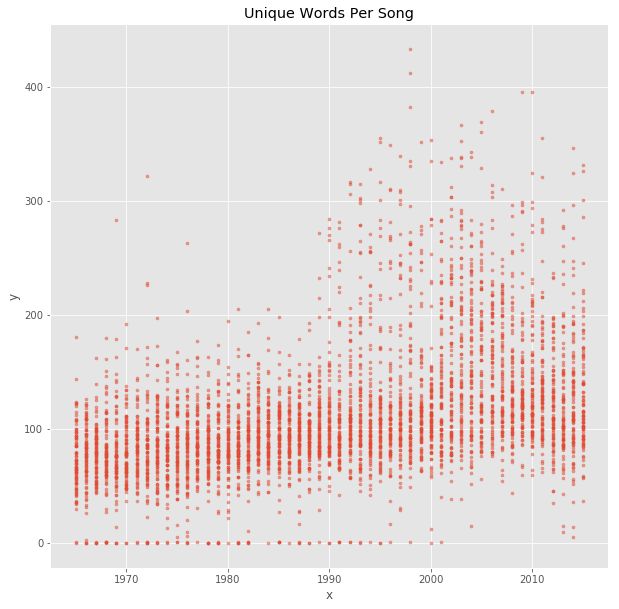

In [384]:
# Create data
N = 500
x = df_new.Year
y = df_new.Unique_Word_Count
colors = (0,0,0)
area = np.pi*3


fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111)

# Plot
plt.scatter(x, y, s=area, alpha=0.5)
plt.title('Unique Words Per Song')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [385]:
fig.savefig(path.join('..', 'assets', 'uniquewordspersong.png'))

# Most Characteristics Words Per Decade

In [572]:
def convertToString(column):
    i = 0
    text = ""
    for i in range(len(column)):
        text = " " + column[i] + text + " "
    return text

In [573]:
df_new.head()

,level_0,index,Song,Artist,Year,Lyrics,Source,Word_Count,Unique_Word_Count
0,0,0,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,125.0,64
1,1,1,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,204.0,94
2,2,2,i cant get no satisfaction,the rolling stones,1965,,1.0,0.0,0
3,3,3,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,152.0,44
4,4,4,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,232.0,88


In [592]:
df_60 = df_new[df_new['Year'] < 1970]
df_70 = df_new[(df_new['Year'] >= 1970) & (df_new['Year'] < 1980)]
df_80 = df_new[(df_new['Year'] >= 1980) & (df_new['Year'] < 1990)]
df_90 = df_new[(df_new['Year'] >= 1990) & (df_new['Year'] < 2000)]
df_00 = df_new[(df_new['Year'] >= 2000) & (df_new['Year'] < 2010)]
df_10 = df_new[df_new['Year'] >= 2010]

df_70.head()

,level_0,index,Song,Artist,Year,Lyrics,Source,Word_Count,Unique_Word_Count
474,474,500,bridge over troubled water,simon garfunkel,1970,when youre weary feeling small when tears are ...,3.0,163.0,77
475,475,501,they long to be close to you,the carpenters,1970,close to youwhy do birds suddenly appear ever...,1.0,174.0,63
476,476,502,american woman,the guess who,1970,umm taa taana umm taa taana umm umm taa taana ...,3.0,310.0,87
477,477,503,raindrops keep fallin on my head,bj thomas,1970,raindrops are falling on my head and just lik...,1.0,175.0,84
478,478,504,war,edwin starr,1970,war huh yeah what is it good for absolutely n...,1.0,338.0,130


In [601]:
def resetIndex(df):
    df.drop(['level_0'],inplace = True, axis = 1)
    df.reset_index(inplace=True)
    return df

In [604]:
df_60 = resetIndex(df_60)
df_70 = resetIndex(df_70)
df_80 = resetIndex(df_80)
df_90 = resetIndex(df_90)
df_00 = resetIndex(df_00)
df_10 = resetIndex(df_10)

/Users/manulohiya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [606]:
text60 = convertToString(df_60.Lyrics)
text70 = convertToString(df_70.Lyrics)
text80 = convertToString(df_80.Lyrics)
text90 = convertToString(df_90.Lyrics)
text00 = convertToString(df_00.Lyrics)
text10 = convertToString(df_10.Lyrics)



In [645]:
def topWords(text):
    n=20
#    Add a function to remove all small words 
    allWords = nltk.tokenize.word_tokenize(text)
#     allWordDist = nltk.FreqDist(w.lower() for w in allWords)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)
    
    
    mostCommon= allWordExceptStopDist.most_common(n)
    res_list = [i[0] for i in mostCommon]
    return res_list


In [644]:
# top_60 = topWords(text60)
# top_70 = topWords(text70)
# top_80 = topWords(text80)
# top_90 = topWords(text90)
top_00 = topWords(text00)
# top_10 = topWords(text10)

top_00


/Users/manulohiya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  import sys


['im',
 'like',
 'know',
 'dont',
 'got',
 'na',
 'get',
 'love',
 'oh',
 'baby',
 'go',
 'girl',
 'make',
 'want',
 'see',
 'cause',
 'wan',
 'youre',
 'one',
 'cant']